# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
cities

['ola',
 'hawaiian paradise park',
 'visby',
 'invercargill',
 'lebu',
 'qaqortoq',
 'magadan',
 'badger',
 'coquimbo',
 "'ohonua",
 'marianna',
 'adigrat',
 'harper',
 'yellowknife',
 'remire-montjoly',
 'hadibu',
 'vila velha',
 'iskateley',
 'east florence',
 'bilibino',
 'west island',
 'waitangi',
 'clarksville',
 'whitehorse',
 'bethel',
 'ulladulla',
 'port-aux-francais',
 'port lincoln',
 'isafjordur',
 'carentan',
 'kasangulu',
 'hermanus',
 'bamboo flat',
 'prado',
 'ushuaia',
 'nova sintra',
 'flying fish cove',
 'keflavik',
 'vilyuchinsk',
 'reitz',
 'afaahiti',
 'blackmans bay',
 'grytviken',
 'ilulissat',
 'hakui',
 'stanley',
 'nemuro',
 'port mathurin',
 'albany',
 'palapag',
 'tiksi',
 'adamstown',
 'puerto natales',
 'la gi',
 'alofi',
 'anadyr',
 'hovd',
 'pontes e lacerda',
 'hithadhoo',
 'colonia',
 'saryozek',
 'grand falls-windsor',
 'tura',
 'nishinoomote',
 'pangody',
 'avarua',
 'papatowai',
 'christchurch',
 'yeraliyev',
 "'ajab shir",
 'strezhevoy',
 'yerofe

In [4]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"   # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']             
        city_max_temp = city_weather['main']['temp_max']    
        city_humidity = city_weather['main']['humidity']    
        city_clouds = city_weather['clouds']['all']         
        city_wind = city_weather['wind']['speed']           
        city_country = city_weather['sys']['country']       
        city_date = city_weather['dt']            

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ola
City not found. Skipping...
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | visby
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | magadan
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | marianna
Processing Record 12 of Set 1 | adigrat
Processing Record 13 of Set 1 | harper
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | remire-montjoly
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | east florence
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | west island
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,21.69,95,100,4.12,US,1712691529
1,visby,57.6409,18.2960,11.01,87,100,7.72,SE,1712691697
2,invercargill,-46.4000,168.3500,12.79,96,100,1.34,NZ,1712691724
3,lebu,-37.6167,-73.6500,11.76,67,83,10.44,CL,1712691783
4,qaqortoq,60.7167,-46.0333,-0.21,69,0,1.85,GL,1712691527


In [7]:
# # Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.69,95,100,4.12,US,1712691529
1,visby,57.6409,18.2960,11.01,87,100,7.72,SE,1712691697
2,invercargill,-46.4000,168.3500,12.79,96,100,1.34,NZ,1712691724
3,lebu,-37.6167,-73.6500,11.76,67,83,10.44,CL,1712691783
4,qaqortoq,60.7167,-46.0333,-0.21,69,0,1.85,GL,1712691527


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

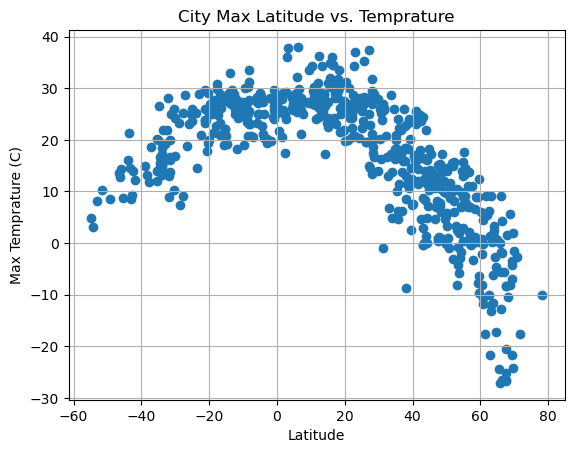

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (C)")
plt.title("City Max Latitude vs. Temprature")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

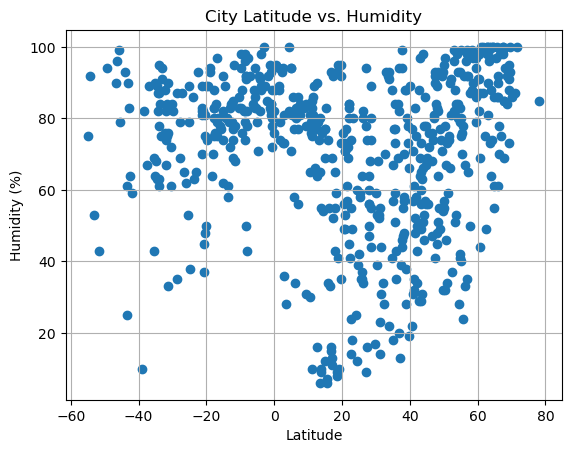

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()
# plt.xlim(-60,80,20)
# plt.ylim(0,100,20)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

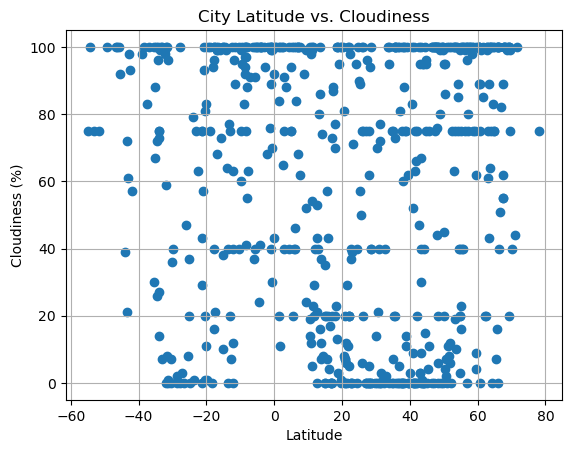

In [11]:
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
# plt.xlim(-60,80,20)
# plt.ylim(0,100,20)
plt.tight_layout
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

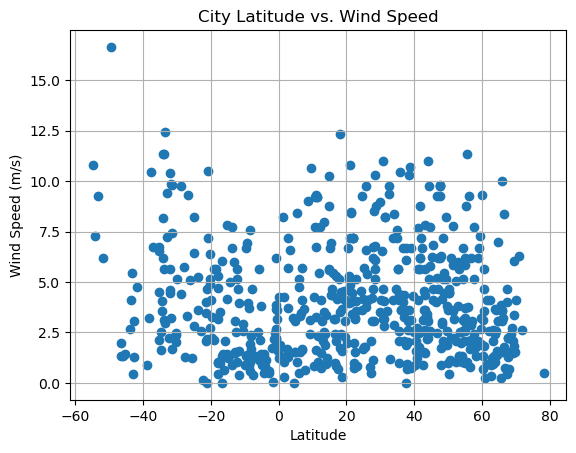

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress(x,y,eqn_coordinates):
    r = st.pearsonr(x,y)
    print(f" r-value :{r[0]}")
    (slope, intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regress_values = x*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # line_eq = f"y ={slope}x +{intercept}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=15, color='red')
    plt.scatter(x,y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.69,95,100,4.12,US,1712691529
1,visby,57.6409,18.2960,11.01,87,100,7.72,SE,1712691697
4,qaqortoq,60.7167,-46.0333,-0.21,69,0,1.85,GL,1712691527
5,magadan,59.5667,150.8000,-9.71,86,9,3.23,RU,1712691784
6,badger,64.8000,-147.5333,0.56,61,75,3.09,US,1712691537


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,invercargill,-46.4000,168.3500,12.79,96,100,1.34,NZ,1712691724
3,lebu,-37.6167,-73.6500,11.76,67,83,10.44,CL,1712691783
7,coquimbo,-29.9533,-71.3436,16.85,82,40,5.14,CL,1712691153
14,vila velha,-20.3297,-40.2925,28.97,81,20,5.14,BR,1712691645
18,west island,-12.1568,96.8225,26.99,74,40,5.66,CC,1712691788


###  Temperature vs. Latitude Linear Regression Plot

 r-value :-0.8453780064450415


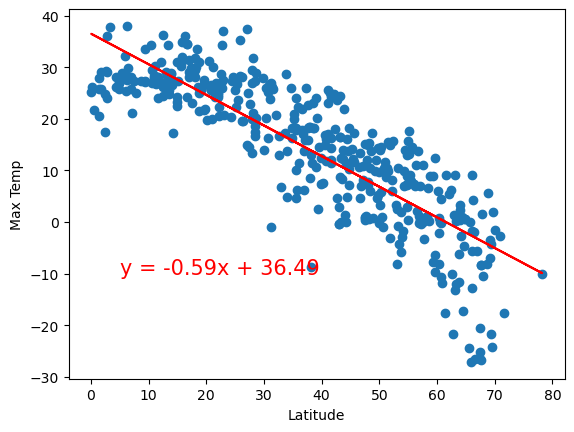

In [16]:
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (5, -10))


 r-value :0.7310108488032367


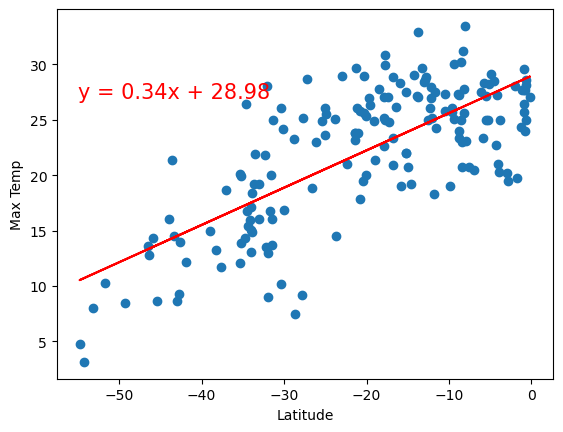

In [17]:
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-55,27))


**Discussion about the linear relationship:** 
##### Nothern Hemisphere <br>
*The negative correlation coefficient (r-value: -0.85) between maximum temperature and latitude in the northern hemisphere suggests a strong linear relationship, As latitude increases (moving northwards), maximum temperatures decreases. This shows that regions farther from the equator experience cooler temperatures.*

##### Southern Hemisphere 
*With r-value of 0.73 in the southern hemisphere, there exists a moderate positive linear relationship between maximum temperature and latitude. it shows area closer to equator having higer temprature.*



### Humidity vs. Latitude Linear Regression Plot

 r-value :0.279778575031416


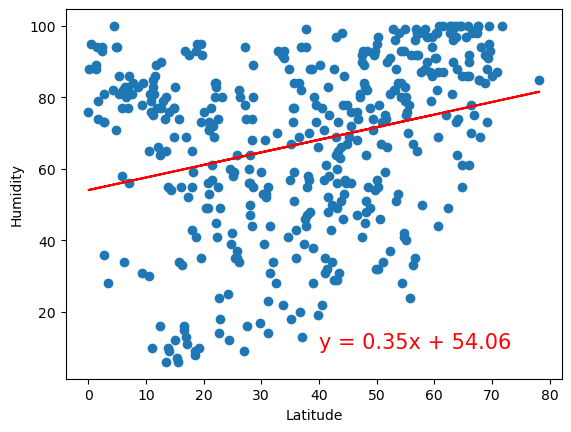

In [18]:
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (40, 10))

 r-value :0.26785979249516056


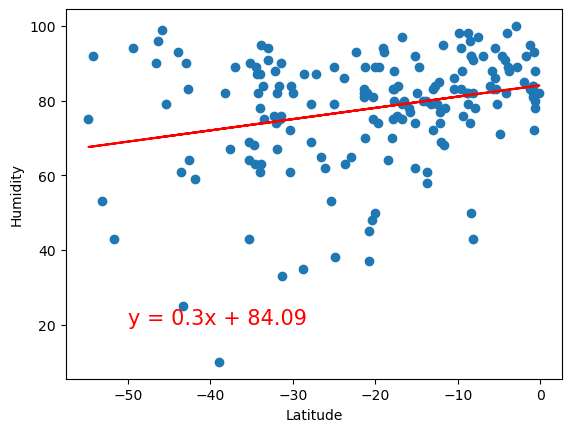

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"),southern_hemi_df["Humidity"], (-50, 20))

**Discussion about the linear relationship:** <br>
*With r-values of 0.28 for the northern hemisphere and 0.27 for the southern hemisphere, the correlation between humidity and latitude appears to be weak in both hemispheres. This shows that latitude not by itself is a strong predictor of humidity levels. Other factors likely have higher impact on humidity levels.*

### Cloudiness vs. Latitude Linear Regression Plot

 r-value :0.17809288456652847


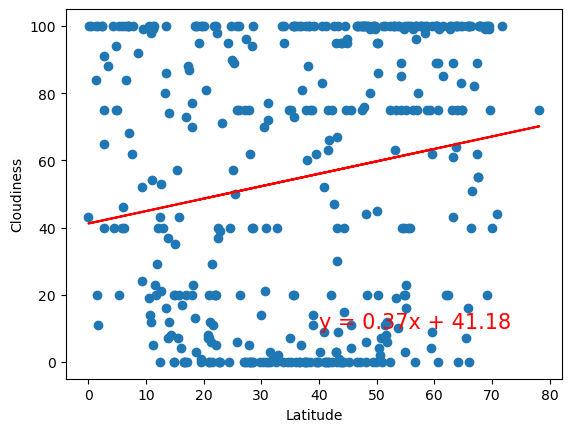

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (40, 10))

 r-value :0.12571531235285263


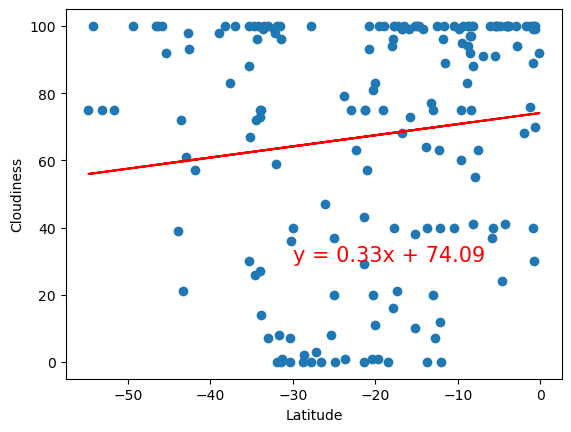

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-30, 30))

**Discussion about the linear relationship:** <br>
*With r-values of 0.18 for the northern hemisphere and 0.13 for the southern hemisphere, the correlation between cloudiness and latitude is quite weak in both hemispheres. This suggests latitude by itself not be a strong predictor of cloudiness levels.*

### Wind Speed vs. Latitude Linear Regression Plot

 r-value :-0.10778235196553114


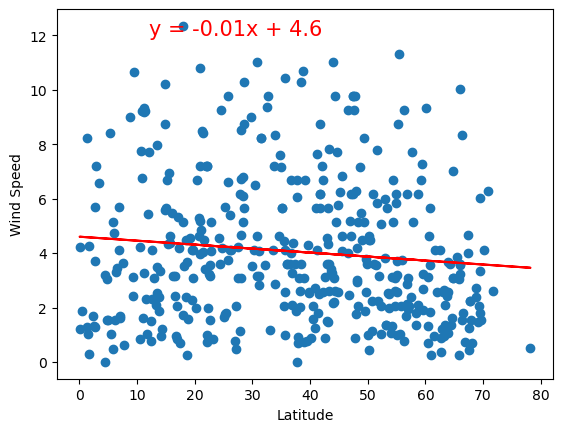

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (12, 12))

 r-value :-0.417690541346343


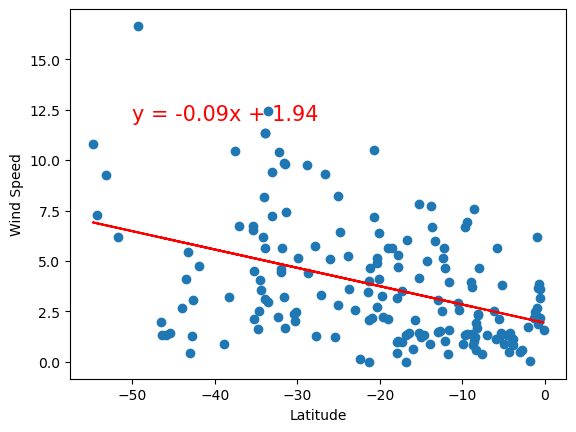

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 12))

**Discussion about the linear relationship:** 
<br>
*With r-value of approximately -0.11 for the northern hemisphere and -0.42 for the southern hemisphere, the correlation between wind speed and latitude is weak. In the northern hemisphere, there seems to be a very slight negative correlation, while in the southern hemisphere, the negative correlation is slightly stronger. but overall both correlations are quite weak, indicating that latitude alone may not be a reliable predictor of wind speed.*